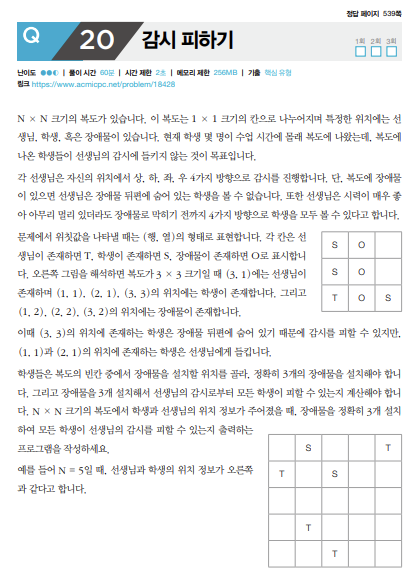

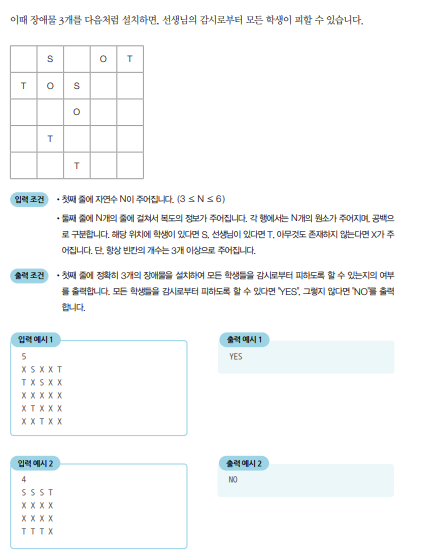

## 전형적인 DFS 문제
아 쒸 개념 보고 하면 어려운건 아니었는데
역시 시간이 오래 걸림

In [2]:
n = int(input())

data = []
teacher = []
wall = []
result = "NO"

# 상하좌우
dx = [-1,1,0,0]
dy = [0,0,-1,1]

for i in range(n):
    data.append(list(map(str, input().split())))
    for j in range(n):
        if data[i][j] == 'T':
            teacher.append((i,j))

def check_t():
    global teacher, data
    for t in teacher:
        for i in range(4):
            x, y = t
            while 0<= x < n and 0<= y < n:
                if data[x][y] == 'O':
                    break
                elif data[x][y] == 'S':
                    return False
                x += dx[i]
                y += dy[i]
    return True

def dfs(count):
    global teacher, data, result, wall
    if count > 3:
        return
    if count == 3:
        if check_t() is True:
            result = "YES"
            return
        else:
            result = "NO"
    
    for i in range(n):
        for j in range(n):
            if data[i][j] == 'X':
                data[i][j] = 'O'
                wall.append((i,j))
                dfs(count+1)
                if result == "YES":
                    return
                wall.remove((i,j))
                data[i][j] = 'X'

dfs(0)
print(result)

YES


## 구글링 해설

이 문제는 14502번 연구소 문제와 비슷하다고 생각하여 그러한 방식으로 풀이를 접근했다.

이 문제를 풀기 위해서는 크게 2가지가 필요하다.

장애물을 설치하는 함수
선생의 상하좌우 일직선으로 학생이 있는지 확인하는 함수
1번 함수(solution(count))
solution 함수는 벽을 설치할 수 있는 모든 경우를 찾는 함수이다.
1번의 함수는 재귀방식을 사용하여 X가 되어 있는 곳을 찾고 'O'로 바꿔준다. 그리고 count를 1증가 시킨 후 다시 함수를 호출한다.
이렇게 했을때 count 3 즉 벽이 3개가 설치 되었을 때 check_S(감시하는 함수)를 실행하여 준다.
그리고 check_S(감시하는 함수)가 끝나면 함수를 종료하고 'O'로 바꾼 곳을 다시 'X'로 변경한다.

위 과정을 장애물을 설치할 수 있는 모든 경우에 실행시켜준다.

2번 함수(check_S)
2번 함수는 선생(T)의 위치에서 상,하,좌,우 일직선으로 학생이 있는지 확인하는 함수이다.
학생이 있어 감시가 가능하면 True
상하좌우 직선상에 학생이 없다면 False를 리턴한다.

for 문으로 상하좌우 움직일 위치를 nx, ny에 좌표값 계산한다.
x,y 가 (0,0) 이면 for문에서 우: (1,0), 좌: (-1,0), 상: (0,1), 하(0,-1)로 움직인다.

그리고 while문을 사용하여 좌표계를 벗어나거나 장애물이 없을 때는
같은 방향으로 계속 이동하게 한다.
이동을 하다가 학생('S')를 만나게 되면 True를 리턴한다.
모든 방향을 확인하고 학생을 만나지 않았다면 False를 리턴한다.


학생을 감시할 수 없는 선생의 수를 count하여 모든 선생이 감시를 할 수 없을 때를 찾는다.

## 답지VER

In [3]:
from itertools import combinations

n = int(input()) # 복도의 크기
board = [] # 복도 정보 (N x N)
teachers = [] # 모든 선생님 위치 정보
spaces = [] # 모든 빈 공간 위치 정보

for i in range(n):
    board.append(list(input().split()))
    for j in range(n):
        # 선생님이 존재하는 위치 저장
        if board[i][j] == 'T':
            teachers.append((i, j))
        # 장애물을 설치할 수 있는 (빈 공간) 위치 저장
        if board[i][j] == 'X':
            spaces.append((i, j))

# 특정 방향으로 감시를 진행 (학생 발견: True, 학생 미발견: False)
def watch(x, y, direction):
    # 왼쪽 방향으로 감시
    if direction == 0:
        while y >= 0:
            if board[x][y] == 'S': # 학생이 있는 경우
                return True
            if board[x][y] == 'O': # 장애물이 있는 경우
                return False
            y -= 1
    # 오른쪽 방향으로 감시
    if direction == 1:
        while y < n:
            if board[x][y] == 'S': # 학생이 있는 경우
                return True
            if board[x][y] == 'O': # 장애물이 있는 경우
                return False
            y += 1
    # 위쪽 방향으로 감시
    if direction == 2:
        while x >= 0:
            if board[x][y] == 'S': # 학생이 있는 경우
                return True
            if board[x][y] == 'O': # 장애물이 있는 경우
                return False
            x -= 1
    # 아래쪽 방향으로 감시
    if direction == 3:
        while x < n:
            if board[x][y] == 'S': # 학생이 있는 경우
                return True
            if board[x][y] == 'O': # 장애물이 있는 경우
                return False
            x += 1
    return False

# 장애물 설치 이후에, 한 명이라도 학생이 감지되는지 검사
def process():
    # 모든 선생의 위치를 하나씩 확인
    for x, y in teachers:
        # 4가지 방향으로 학생을 감지할 수 있는지 확인
        for i in range(4):
            if watch(x, y, i):
                return True
    return False

find = False # 학생이 한 명도 감지되지 않도록 설치할 수 있는지의 여부

# 빈 공간에서 3개를 뽑는 모든 조합을 확인
for data in combinations(spaces, 3):
    # 장애물들을 설치해보기
    for x, y in data:
        board[x][y] = 'O'
    # 학생이 한 명도 감지되지 않는 경우
    if not process():
        # 원하는 경우를 발견한 것임
        find = True
        break
    # 설치된 장애물을 다시 없애기
    for x, y in data:
        board[x][y] = 'X'

if find:
    print('YES')
else:
    print('NO')

5
X S X X T
T X S X X
X X X X X
X T X X X
X X T X X
YES
